# Setting Environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import confusion_matrix, classification_report # classification metrics
from imblearn.over_sampling import SMOTE # SMOTE
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler # scaling methods
from sklearn.model_selection import GridSearchCV # grid search cross validation
from sklearn.model_selection import RandomizedSearchCV # randomized search cross validation
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from pandas_profiling import ProfileReport

# Loading Data

In [2]:
df = pd.read_excel("/Users/annli/Downloads/Bankruptcy_data_Final.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EPS                 92867 non-null  float64
 1   Liquidity           92625 non-null  float64
 2   Profitability       92625 non-null  float64
 3   Productivity        92625 non-null  float64
 4   Leverage Ratio      92846 non-null  float64
 5   Asset Turnover      92625 non-null  float64
 6   Operational Margin  87315 non-null  float64
 7   Return on Equity    92864 non-null  float64
 8   Market Book Ratio   92815 non-null  float64
 9   Assets Growth       86171 non-null  float64
 10  Sales Growth        86171 non-null  float64
 11  Employee Growth     85862 non-null  float64
 12  BK                  92872 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.2 MB


In [3]:
df.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


In [4]:
# check the column “BK” in the data 
print('1:', df['BK'][df['BK']==1].count())
print('0:', df['BK'][df['BK']==0].count())

1: 558
0: 92314


<AxesSubplot:title={'center':'Bankruptcy Distribution'}, ylabel='BK'>

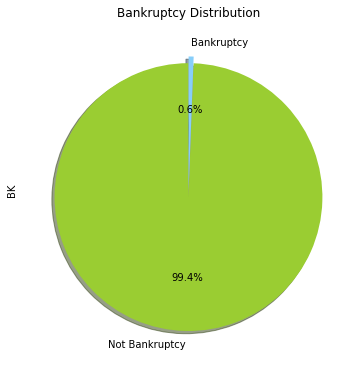

In [5]:
#Target Distribution
plt.figure(figsize=(6,9))
labels = [u'Not Bankruptcy',u'Bankruptcy']
colors = ['yellowgreen','lightskyblue']
explode = (0.05,0)
df['BK'].value_counts().plot.pie(explode=explode,labels=labels,colors=colors,title='Bankruptcy Distribution',
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = True,
                                startangle = 90,pctdistance = 0.6)


In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
EPS,92867.0,-14.461355,2195.467288,-3.840000e+05,-0.140000,0.330000,1.530000,55339.00
Liquidity,92625.0,-2.631237,121.610921,-2.596852e+04,0.020000,0.190000,0.400000,1.00
Profitability,92625.0,-29.537274,677.230667,-7.968200e+04,-0.640000,0.070000,0.310000,140.58
Productivity,92625.0,-1.222870,35.885556,-5.093000e+03,-0.060000,0.060000,0.110000,1102.00
Leverage Ratio,92846.0,1.345316,253.038093,-7.811000e+03,0.000000,0.280000,0.820000,75970.38
Asset Turnover,92625.0,1.053613,2.115945,-3.159000e+01,0.390000,0.830000,1.390000,276.38
Operational Margin,87315.0,-7.915485,214.460079,-3.017570e+04,-0.030000,0.060000,0.140000,394.47
Return on Equity,92864.0,-2.112382,352.596902,-8.887514e+04,-0.080000,0.030000,0.070000,39500.00
Market Book Ratio,92815.0,358.506265,26063.637981,-3.151500e+06,11.200000,58.280000,240.140000,3455419.33
Assets Growth,86171.0,1.294075,73.769522,-1.000000e+00,-0.052596,0.051844,0.192062,14231.00


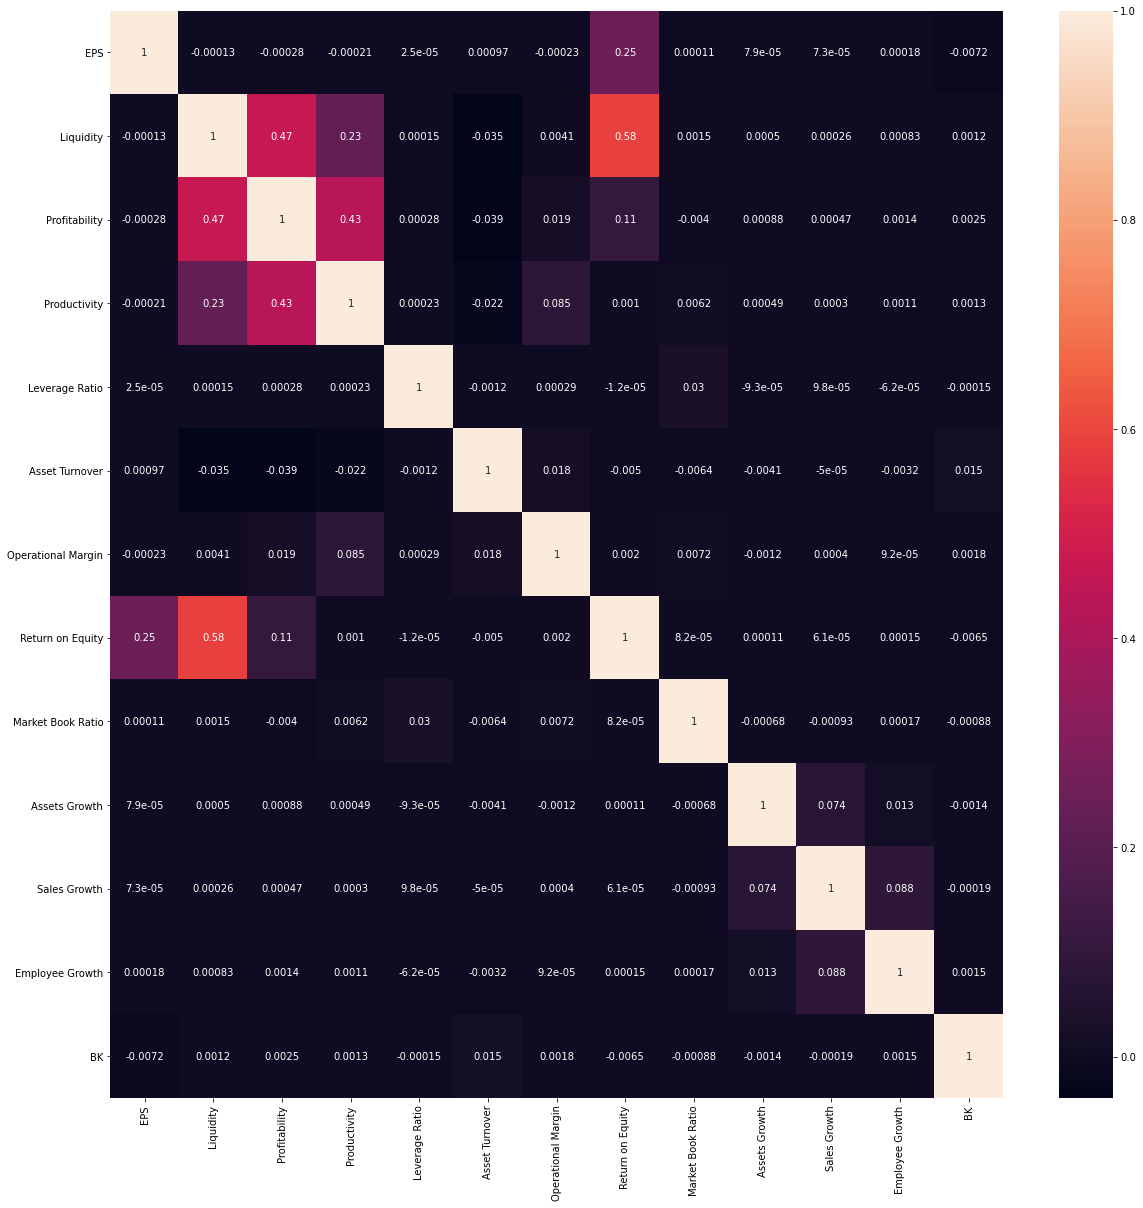

In [7]:
# check correlation between target variable 'BK' and all other features 
corr = df[:].corr()

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.show()

# don't see highly correlated pairs overall
# Asset Turnover ratio has the highest positive correlation Bankruptcy RELATIVELY
# EPS has the lowest negative correlation with Bankruptcy RELATIVELY

In [8]:
# check the missing data
nan_list = df.isnull().sum()
print(nan_list)

EPS                      5
Liquidity              247
Profitability          247
Productivity           247
Leverage Ratio          26
Asset Turnover         247
Operational Margin    5557
Return on Equity         8
Market Book Ratio       57
Assets Growth         6701
Sales Growth          6701
Employee Growth       7010
BK                       0
dtype: int64


In [ ]:
#df = df.fillna(0)

# Spliting Train and Test datasets

In [9]:
X = df.drop(columns = ['BK'], axis=1)
y = df['BK']


In [ ]:
#standard_scaler = StandardScaler()
#numeric_cols = X.columns[X.dtypes !="object"].values
#function_transformer = preprocessing.FunctionTransformer()
#power_transformer = preprocessing.PowerTransformer()

In [ ]:
#X[numeric_cols] = standard_scaler.fit_transform(X[numeric_cols])
#X[numeric_cols] = power_transformer.fit_transform(X[numeric_cols])
#X[numeric_cols] = function_transformer.fit_transform(X[numeric_cols])

In [10]:
X = df.drop(columns = ['BK'], axis=1)
y = df['BK']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
numeric_features = X_train.select_dtypes(include='number').columns.tolist()
print(numeric_features)

['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Leverage Ratio', 'Asset Turnover', 'Operational Margin', 'Return on Equity', 'Market Book Ratio', 'Assets Growth', 'Sales Growth', 'Employee Growth']


In [12]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

# build pipeline: replace NAs with KNNImputer
# KNNImputer is a data transform that is first configured based on the method used to estimate the missing values, and we use the Euclidean distance meansure
numeric_pipeline = Pipeline(steps=[('impute', KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean'))])


In [13]:
# fit X_train data
numeric_pipeline.fit_transform(X_train)

array([[ 2.36      ,  0.        ,  0.16      , ...,  0.06472706,
        -0.00673241, -0.11599512],
       [ 0.89      ,  0.88      , -0.95      , ...,  0.16448988,
        -1.        , -0.68617021],
       [ 1.73      ,  0.64      ,  0.36      , ...,  0.08672055,
        -0.19238616, -0.125     ],
       ...,
       [ 0.66      ,  0.17      ,  0.34      , ...,  0.35312105,
         0.62230187,  0.00972898],
       [-0.16      ,  0.17      , -0.4       , ...,  0.04209255,
        -0.00724795,  0.04255319],
       [-2.95      ,  0.89      , -2.84      , ..., -0.38462866,
         0.80966325, -0.61870504]])

In [14]:
from sklearn.compose import ColumnTransformer
data_pipeline = ColumnTransformer(transformers=[('numeric', numeric_pipeline, numeric_features)])

In [15]:
# fit entire data pipeline
data_pipeline.fit_transform(X_train)

array([[ 2.36      ,  0.        ,  0.16      , ...,  0.06472706,
        -0.00673241, -0.11599512],
       [ 0.89      ,  0.88      , -0.95      , ...,  0.16448988,
        -1.        , -0.68617021],
       [ 1.73      ,  0.64      ,  0.36      , ...,  0.08672055,
        -0.19238616, -0.125     ],
       ...,
       [ 0.66      ,  0.17      ,  0.34      , ...,  0.35312105,
         0.62230187,  0.00972898],
       [-0.16      ,  0.17      , -0.4       , ...,  0.04209255,
        -0.00724795,  0.04255319],
       [-2.95      ,  0.89      , -2.84      , ..., -0.38462866,
         0.80966325, -0.61870504]])

In [16]:
# use pipeline to transform X_train and X_test
X_train_transformed = data_pipeline.transform(X_train)
X_test_transformed = data_pipeline.transform(X_test)

# Data processing

In [17]:
from collections import Counter
# the ratio of 1 and 0 shown this is a imbalanced dataset
print(Counter(y))

Counter({0: 92314, 1: 558})


In [19]:
from imblearn.over_sampling import SMOTE
# Define SMOTE model with random state
smo = SMOTE(random_state=42)
X_smo, y_smo = smo.fit_sample(X_train_transformed, y_train.ravel())

In [20]:
print(Counter(y_smo))

Counter({0: 73854, 1: 73854})


<AxesSubplot:title={'center':'After SMOTE'}, ylabel='None'>

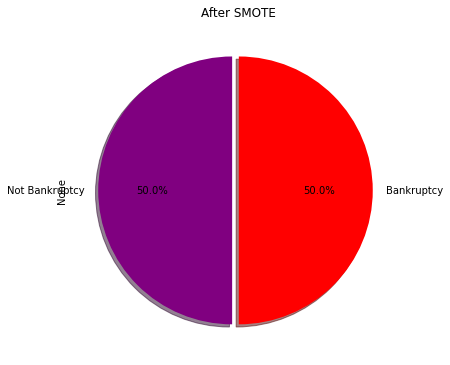

In [22]:
plt.figure(figsize=(6,9))
labels = [u'Not Bankruptcy',u'Bankruptcy']
colors = ['purple','red']
explode = (0.05,0)
pd.Series(y_smo).value_counts().plot.pie(explode=explode,labels=labels,colors=colors,title = 'After SMOTE',
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = True,
                                startangle = 90,pctdistance = 0.6)

0.000000 0.000000 1.900000
0.333333 0.000000 0.900000
0.333333 0.666667 0.600000
0.666667 0.666667 0.500000
0.666667 1.000000 0.400000
1.000000 1.000000 0.300000


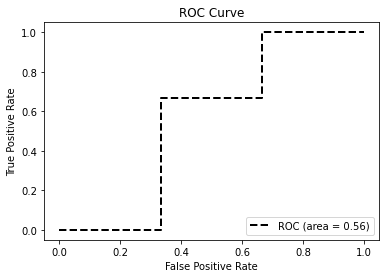

In [23]:
#ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
 
y_label = ([1, 1, 1, 2, 2, 2])  
y_pre = ([0.3, 0.5, 0.9, 0.8, 0.4, 0.6])
fpr, tpr, thersholds = roc_curve(y_label, y_pre, pos_label=2)
 
for i, value in enumerate(thersholds):
    print("%f %f %f" % (fpr[i], tpr[i], value))
 
roc_auc = auc(fpr, tpr)
 
plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
 
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#Confusion Matrix returns in the format: cm[0,0], cm[0,1], cm[1,0], cm[1,1]: tn, fp, fn, tp

# Sensitivity
def custom_sensitivity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fn))

# Specificity
def custom_specificity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fp))

# Positive Predictive Value
def custom_ppv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fp))

# Negative Predictive Value
def custom_npv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fn))

# Accuracy
def custom_accuracy_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ((tn+tp)/(tn+tp+fn+fp))



# Logistic Regression with tuning

In [24]:
from sklearn import linear_model, decomposition, datasets
logistic = linear_model.LogisticRegression()
logistic_param_grid = {"penalty": ['l1', 'l2'],
                 'max_iter': [100,200,300],
                 "C": [0.01, 0.1, 1, 10, 100],
                 "solver": ['liblinear'],
                 "verbose":[1],
                 "max_iter": [100, 500, 1000, 1500]}
logistic_gs = GridSearchCV(logistic, param_grid = logistic_param_grid, scoring = "roc_auc", n_jobs = 5,cv = 5)

In [25]:
logistic_gs.fit(X_smo,y_smo)

[LibLinear]

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=5,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000, 1500],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear'],
                         'verbose': [1]},
             scoring='roc_auc')

In [26]:
best_grid_logistic = logistic_gs.best_estimator_
best_grid_logistic
print('Best Estimator:', best_grid_logistic)
print('Best Parameters:',logistic_gs.best_params_)
print('\n\nBest Score:', logistic_gs.best_score_,'\n')

Best Estimator: LogisticRegression(C=0.01, max_iter=500, solver='liblinear', verbose=1)
Best Parameters: {'C': 0.01, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear', 'verbose': 1}


Best Score: 0.6928112450050347 



In [72]:
#Predict

y_pred = logistic_gs.predict(X_test_transformed)
y_probs = logistic_gs.predict_proba(X_test_transformed)
y_probs = y_probs[:, 1]

print(classification_report(y_test, y_pred))
print(f'auc score:{ roc_auc_score(y_test, y_probs)}')

              precision    recall  f1-score   support

           0       1.00      0.69      0.82     18460
           1       0.01      0.53      0.02       115

    accuracy                           0.69     18575
   macro avg       0.50      0.61      0.42     18575
weighted avg       0.99      0.69      0.81     18575

auc score:0.6295190541240755


                                   Accuracy: 0.6922207267833109
                   SENSITIVITY (aka RECALL): 0.5304347826086957
                 SPECIFICITY (aka FALL-OUT): 0.693228602383532
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.010656883298392733
                 NEGATIVE PREDICTIVE VALUE): 0.9957979923741344


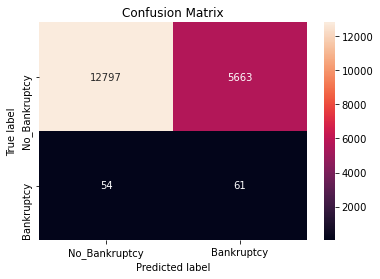

In [73]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted label');ax.set_ylabel('True label');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No_Bankruptcy', 'Bankruptcy']); 
ax.yaxis.set_ticklabels(['No_Bankruptcy', 'Bankruptcy'])

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

# Random Forest with tuning

In [35]:
rf = RandomForestClassifier()
rf_param_grid = {'max_depth':np.arange(1, 20, 1)}
rf_gs = GridSearchCV(rf, param_grid = rf_param_grid, scoring = "roc_auc",cv = 5)

In [32]:
param_test1= {'n_estimators':range(10,70,10)}  
gsearch1= GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,  
                                 min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10),  
                       param_grid =param_test1, scoring='roc_auc',cv=5)  
gsearch1.fit(X_smo,y_smo)  
gsearch1.cv_results_,gsearch1.best_params_, gsearch1.best_score_



({'mean_fit_time': array([ 1.83804035,  3.60784407,  5.33175788,  7.16855054,  8.92809405,
         10.67024484]),
  'std_fit_time': array([0.06346324, 0.04673401, 0.03929984, 0.07097272, 0.06864486,
         0.10970716]),
  'mean_score_time': array([0.02989326, 0.0420146 , 0.05750837, 0.07389297, 0.08911581,
         0.10467858]),
  'std_score_time': array([0.00737116, 0.00063031, 0.00024961, 0.00045271, 0.00091299,
         0.00015441]),
  'param_n_estimators': masked_array(data=[10, 20, 30, 40, 50, 60],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 10},
   {'n_estimators': 20},
   {'n_estimators': 30},
   {'n_estimators': 40},
   {'n_estimators': 50},
   {'n_estimators': 60}],
  'split0_test_score': array([0.97137962, 0.97242885, 0.97333124, 0.97350276, 0.973806  ,
         0.97402005]),
  'split1_test_score': array([0.97305908, 0.97402628, 0.97407801, 0.97485227, 0.9755327 ,
      

In [41]:
param_test2= {'max_depth':range(3,14,2), 'min_samples_split':range(50,201,20)}  
gsearch2= GridSearchCV(estimator = RandomForestClassifier(n_estimators= 60,  
                                 min_samples_leaf=20,max_features='sqrt' ,oob_score=True,random_state=10),  
   param_grid = param_test2,scoring='roc_auc',iid=False, cv=5)  
gsearch2.fit(X_smo,y_smo)  
gsearch2.cv_results_,gsearch2.best_params_, gsearch2.best_score_



KeyboardInterrupt: 

In [ ]:
param_test3= {'min_samples_split':range(80,150,20), 'min_samples_leaf':range(10,60,10)}  
gsearch3= GridSearchCV(estimator = RandomForestClassifier(n_estimators= 70,max_depth=5,  
                                 max_features='sqrt' ,oob_score=True, random_state=10),  
   param_grid = param_test3,scoring='roc_auc',iid=False, cv=5)  
gsearch3.fit(X_smo,y_smo)  
gsearch3.cv_results_,gsearch3.best_params_, gsearch3.best_score_



In [ ]:
param_test4= {'max_features':range(3,11,2)}  
gsearch4= GridSearchCV(estimator = RandomForestClassifier(n_estimators= 70,max_depth=5, min_samples_split=140,  
                                 min_samples_leaf=10 ,oob_score=True, random_state=10),  
   param_grid = param_test4,scoring='roc_auc',iid=False, cv=5)  
gsearch4.fit(X,y)  
gsearch4.cv_results_,gsearch4.best_params_, gsearch4.best_score_  



In [37]:
rf = RandomForestClassifier()

rf_param_grid = {'n_estimators':[60],
                 'max_depth': [5],
                 'min_samples_split': [140],
                 'min_samples_leaf': [10], 
                 'criterion':['entropy'],
                 'max_features':[3],
                  }
rf_gs = GridSearchCV(rf, param_grid = rf_param_grid, scoring = "roc_auc",cv = 10)

In [38]:
rf_gs.fit(X_smo,y_smo)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [5],
                         'max_features': [3], 'min_samples_leaf': [10],
                         'min_samples_split': [140], 'n_estimators': [60]},
             scoring='roc_auc')

In [39]:
best_grid_rf = rf_gs.best_estimator_
best_grid_rf
rf_gs.best_params_
print('Best Estimator:', best_grid_rf)
print('Best Parameters:',rf_gs.best_params_)
print('\n\nBest Score:', rf_gs.best_score_,'\n')

Best Estimator: RandomForestClassifier(criterion='entropy', max_depth=5, max_features=3,
                       min_samples_leaf=10, min_samples_split=140,
                       n_estimators=60)
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 140, 'n_estimators': 60}


Best Score: 0.9553423529047163 



In [66]:
#Predict

y_pred = rf_gs.predict(X_test_transformed)
y_probs = rf_gs.predict_proba(X_test_transformed)
y_probs = y_probs[:, 1]

print(classification_report(y_test, y_pred))
print(f'auc score:{ roc_auc_score(y_test, y_probs)}')

              precision    recall  f1-score   support

           0       1.00      0.87      0.93     18460
           1       0.03      0.77      0.07       115

    accuracy                           0.86     18575
   macro avg       0.52      0.82      0.50     18575
weighted avg       0.99      0.86      0.92     18575

auc score:0.9008288190682556


                                   Accuracy: 0.8644952893674294
                   SENSITIVITY (aka RECALL): 0.7739130434782608
                 SPECIFICITY (aka FALL-OUT): 0.865059588299025
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.034496124031007755
                 NEGATIVE PREDICTIVE VALUE): 0.9983744920287589


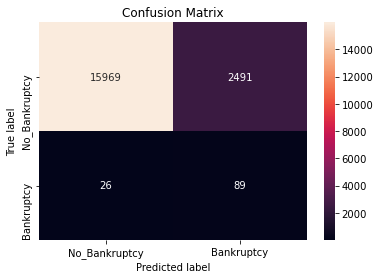

In [67]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted label');ax.set_ylabel('True label');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No_Bankruptcy', 'Bankruptcy']); 
ax.yaxis.set_ticklabels(['No_Bankruptcy', 'Bankruptcy'])

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

# Naive Bayes with tuning

In [43]:
nb = GaussianNB()
Pipe= Pipeline([('nb', nb)])
param_grid = {'nb__var_smoothing': np.arange(0, 10, 0.003),
              }
nb_gs = GridSearchCV(Pipe,param_grid,cv=15,scoring='roc_auc',n_jobs=-1)


In [44]:
nb_gs.fit(X_smo,y_smo)

GridSearchCV(cv=15, estimator=Pipeline(steps=[('nb', GaussianNB())]), n_jobs=-1,
             param_grid={'nb__var_smoothing': array([0.000e+00, 3.000e-03, 6.000e-03, ..., 9.993e+00, 9.996e+00,
       9.999e+00])},
             scoring='roc_auc')

In [45]:
best_grid_nb = nb_gs.best_estimator_
best_grid_nb
print('Best Estimator:', best_grid_nb)
print('Best Parameters:',nb_gs.best_params_)
print('\n\nBest Score:', nb_gs.best_score_,'\n')

Best Estimator: Pipeline(steps=[('nb', GaussianNB(var_smoothing=6.429))])
Best Parameters: {'nb__var_smoothing': 6.429}


Best Score: 0.7805434201634172 



In [68]:

y_pred = nb_gs.predict(X_test_transformed)
y_probs = nb_gs.predict_proba(X_test_transformed)
y_probs = y_probs[:, 1]

print(classification_report(y_test, y_pred))
print(f'auc score:{ roc_auc_score(y_test, y_probs)}')

              precision    recall  f1-score   support

           0       1.00      0.00      0.01     18460
           1       0.01      1.00      0.01       115

    accuracy                           0.01     18575
   macro avg       0.50      0.50      0.01     18575
weighted avg       0.99      0.01      0.01     18575

auc score:0.7836167506712517


                                   Accuracy: 0.008721399730820995
                   SENSITIVITY (aka RECALL): 1.0
                 SPECIFICITY (aka FALL-OUT): 0.0025460455037919828
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.0062068221070811745
                 NEGATIVE PREDICTIVE VALUE): 1.0


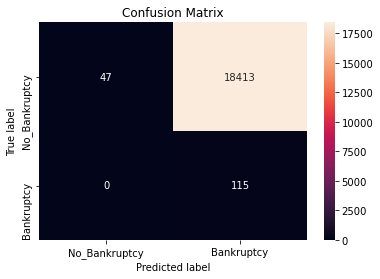

In [69]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted label');ax.set_ylabel('True label');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No_Bankruptcy', 'Bankruptcy']); 
ax.yaxis.set_ticklabels(['No_Bankruptcy', 'Bankruptcy'])

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))



# LDA with tuning

In [50]:
ld = LinearDiscriminantAnalysis()
Pipe= Pipeline([('ld', ld)])
param_grid = {'ld__solver':['svd', 'lsqr', 'eigen'],
             'ld__shrinkage':['auto', 'float'],
             'ld__n_components': (1, 2, 3, 4, 5),
             'ld__store_covariance': [True, False],
             'ld__tol': (0.0001, 0.0002, 0.0003)}


ld_gs = GridSearchCV(Pipe,param_grid,cv=10,scoring='roc_auc',n_jobs=5)



In [51]:
ld_gs.fit(X_smo,y_smo)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('ld', LinearDiscriminantAnalysis())]),
             n_jobs=5,
             param_grid={'ld__n_components': (1, 2, 3, 4, 5),
                         'ld__shrinkage': ['auto', 'float'],
                         'ld__solver': ['svd', 'lsqr', 'eigen'],
                         'ld__store_covariance': [True, False],
                         'ld__tol': (0.0001, 0.0002, 0.0003)},
             scoring='roc_auc')

In [52]:
best_grid_ld = ld_gs.best_estimator_
best_grid_ld
print('Best Estimator:', best_grid_ld)
print('Best Parameters:',ld_gs.best_params_)
print('\n\nBest Score:', ld_gs.best_score_,'\n')

Best Estimator: Pipeline(steps=[('ld',
                 LinearDiscriminantAnalysis(n_components=1, shrinkage='auto',
                                            solver='lsqr',
                                            store_covariance=True))])
Best Parameters: {'ld__n_components': 1, 'ld__shrinkage': 'auto', 'ld__solver': 'lsqr', 'ld__store_covariance': True, 'ld__tol': 0.0001}


Best Score: 0.6635110519245109 



In [70]:
#Predict
y_pred = ld_gs.predict(X_test_transformed)
y_probs = ld_gs.predict_proba(X_test_transformed)
y_probs = y_probs[:, 1]

print(classification_report(y_test, y_pred))
print(f'auc score:{ roc_auc_score(y_test, y_probs)}')

              precision    recall  f1-score   support

           0       1.00      0.70      0.82     18460
           1       0.01      0.47      0.02       115

    accuracy                           0.70     18575
   macro avg       0.50      0.58      0.42     18575
weighted avg       0.99      0.70      0.82     18575

auc score:0.594540958123322


                                   Accuracy: 0.6963122476446837
                   SENSITIVITY (aka RECALL): 0.46956521739130436
                 SPECIFICITY (aka FALL-OUT): 0.6977248104008668
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.009584664536741214
                 NEGATIVE PREDICTIVE VALUE): 0.9952862993586277


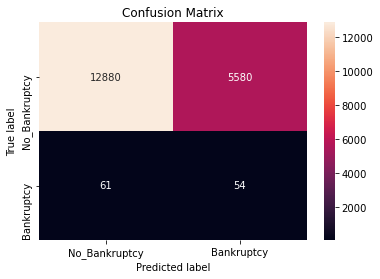

In [71]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted label');ax.set_ylabel('True label');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No_Bankruptcy', 'Bankruptcy']); 
ax.yaxis.set_ticklabels(['No_Bankruptcy', 'Bankruptcy'])

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))


